# `20190415a` Knife blade

In [1]:
from pyUn0 import *

import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import hilbert

Not loading RPi.GPIO as not on RPi


### Exploring FFT and different spectral components

Data acquired


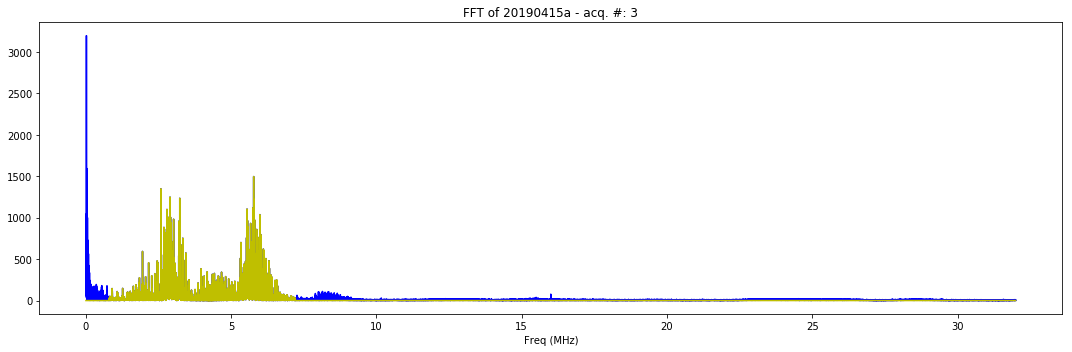

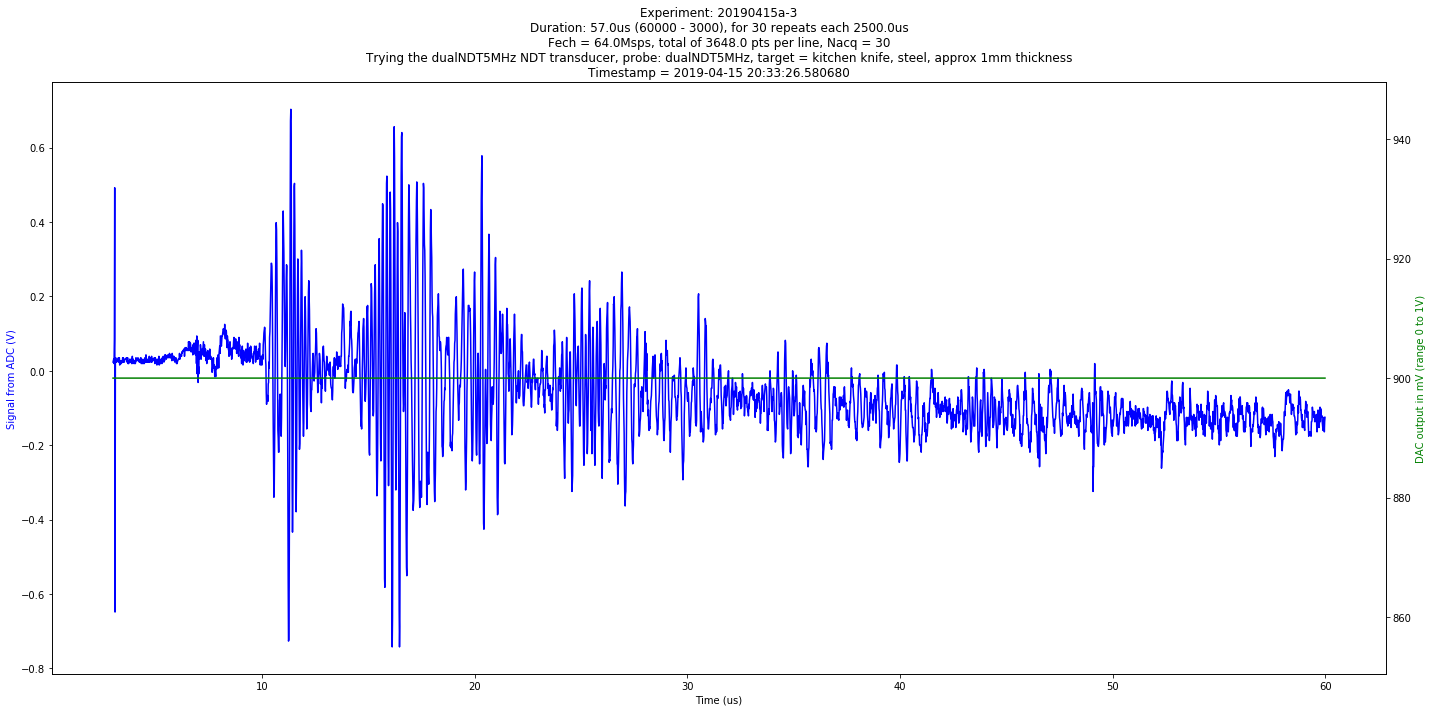

In [2]:
y = us_json()
y.fPiezo = 4
y.Bandwidth = 1.6
y.JSONprocessing("./data/20190415a-3.json")
y.create_fft() 

y.mkImg()

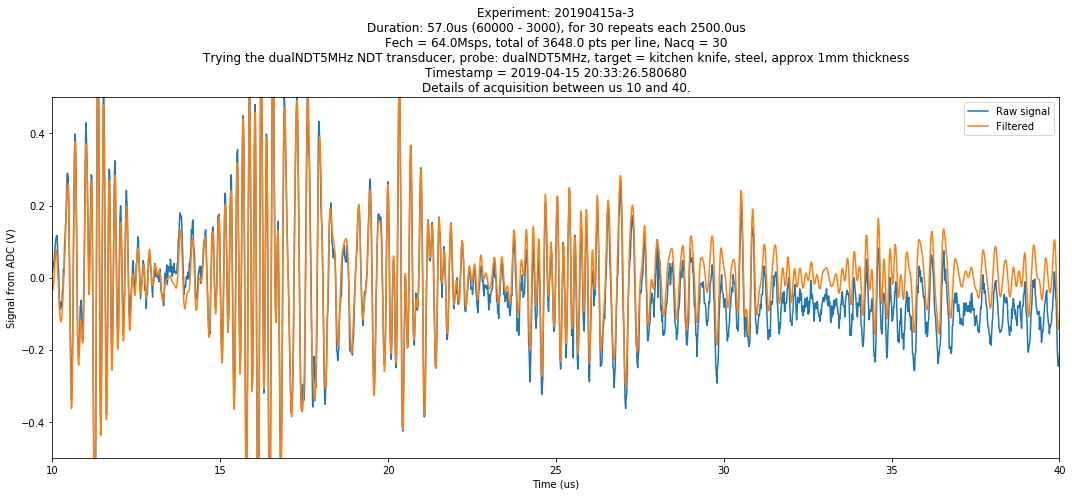

In [3]:
fig=plt.figure(figsize=(15, 7))
ax=fig.add_subplot(111)
minT,maxT=10, 40
ax.plot(y.t,y.tmp,label="Raw signal")
ax.plot(y.t,y.filtered_signal,label = "Filtered")
ax.set_xlim(minT,maxT)
ax.set_ylim(-0.5, 0.5)
ax.legend()

DESC = y.create_title_text()+"\nDetails of acquisition between us "+str(minT)+" and "+ str(maxT)+"."
plt.title(DESC)
ax.set_xlabel('Time (us)')
ax.set_ylabel('Signal from ADC (V)')
plt.tight_layout()

file_name = "images/details_"+str(minT)+"-"+str(maxT)+"_"+y.iD+"-"+str(y.N)+".jpg"
plt.savefig(file_name)
tag_image(file_name,"matty,dualNDT5MHz", y.experiment["id"], "graph", DESC)

plt.show()

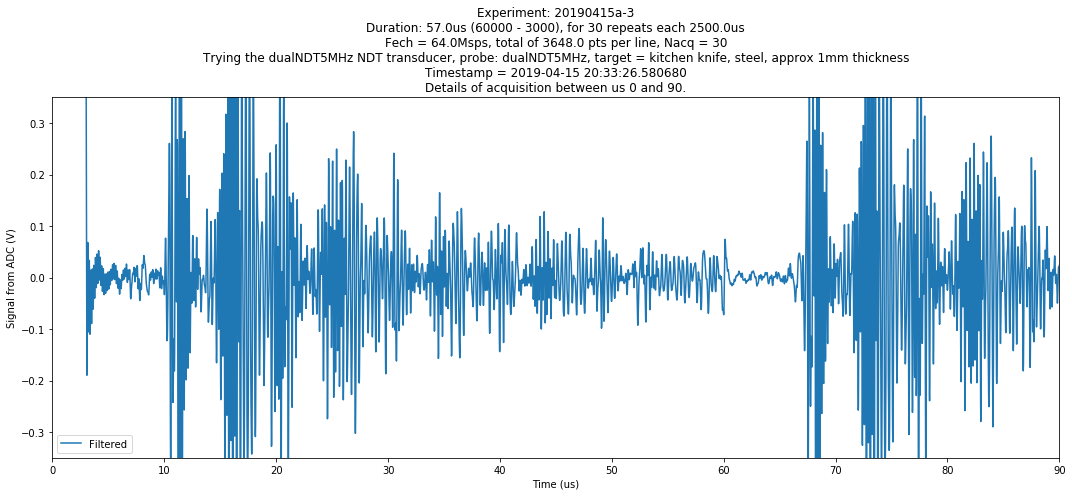

In [4]:
fig=plt.figure(figsize=(15, 7))
ax=fig.add_subplot(111)
minT,maxT=0, 90

ax.plot(y.t,y.filtered_signal,label = "Filtered")
ax.set_xlim(minT,maxT)
ax.set_ylim(-0.35, 0.35)
ax.legend()

DESC = y.create_title_text()+"\nDetails of acquisition between us "+str(minT)+" and "+ str(maxT)+"."
plt.title(DESC)
ax.set_xlabel('Time (us)')
ax.set_ylabel('Signal from ADC (V)')
plt.tight_layout()

file_name = "images/details_"+str(minT)+"-"+str(maxT)+"_"+y.iD+"-"+str(y.N)+".jpg"
plt.savefig(file_name)    
tag_image(file_name,"matty,dualNDT5MHz", y.experiment["id"], "signal", DESC)

plt.show()

## Using all lines

3648 30


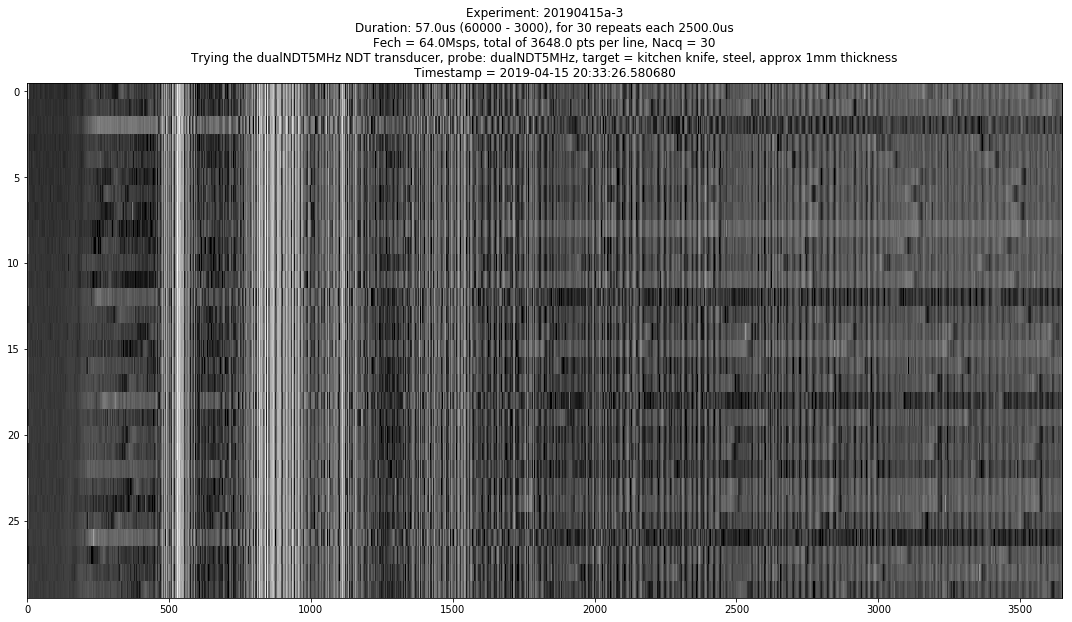

In [5]:
clean_image = y.mk2DArray()

((30, 3648), (3648,))


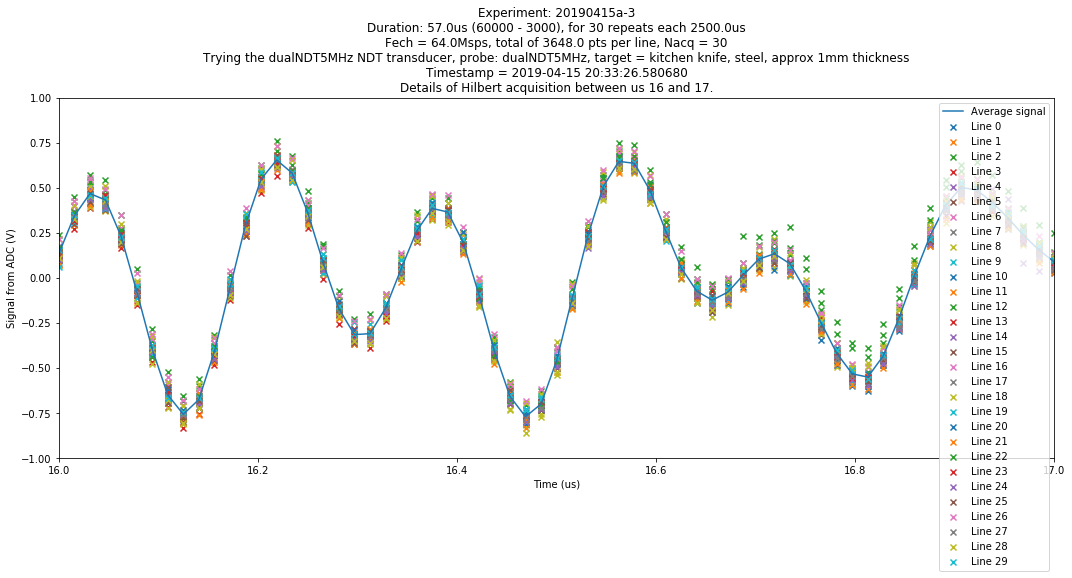

In [8]:
print(clean_image.shape,clean_image.sum(0).shape)
avg_signal = clean_image.sum(0)/len(clean_image)
lenmax = len(clean_image[0])
T = y.t[0:lenmax]

fig=plt.figure(figsize=(15, 7))
ax=fig.add_subplot(111)
minT,maxT=16,17
for k in range(len(clean_image)):
    ax.scatter(T,clean_image[k],label = "Line "+str(k),marker="x")
    
ax.plot(T,avg_signal,label = "Average signal")

ax.set_xlim(minT,maxT)
ax.set_ylim(-1,1)

ax.legend()

DESC = y.create_title_text()+"\nDetails of Hilbert acquisition between us "+str(minT)+" and "+ str(maxT)+"."
plt.title(DESC)
ax.set_xlabel('Time (us)')
ax.set_ylabel('Signal from ADC (V)')
plt.tight_layout()

file_name = "images/details_alllines_avg_"+str(minT)+"-"+str(maxT)+"_"+y.iD+"-"+str(y.N)+".jpg"
plt.savefig(file_name)
tag_image(file_name,"matty,dualNDT5MHz", y.experiment["id"], "hilbert,signal", DESC)

plt.show()

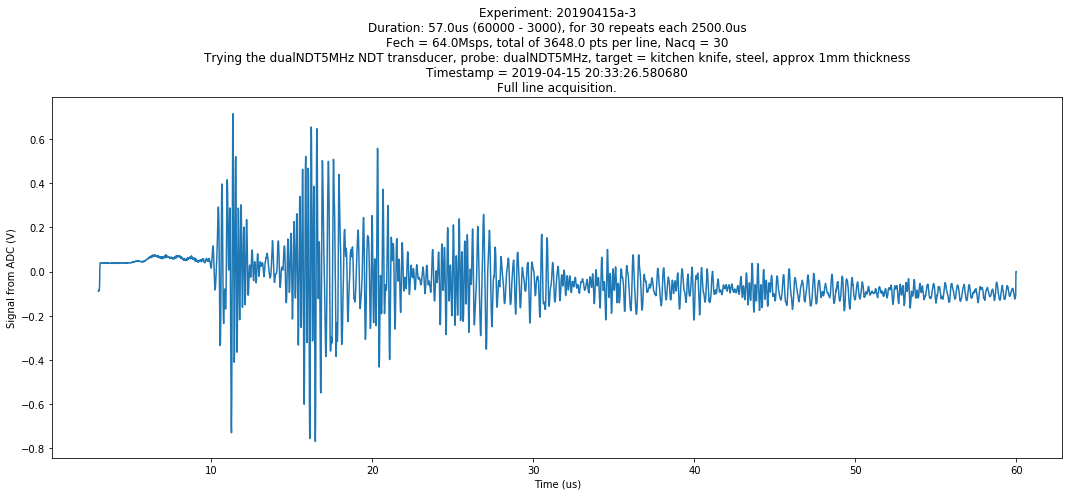

In [9]:
fig=plt.figure(figsize=(15, 7))
ax=fig.add_subplot(111)
    
ax.plot(T,avg_signal,label = "Average signal")

DESC = y.create_title_text()+"\nFull line acquisition."
plt.title(DESC)
ax.set_xlabel('Time (us)')
ax.set_ylabel('Signal from ADC (V)')
plt.tight_layout()

file_name = "images/Full_details_alllines_avg_"+str(minT)+"-"+str(maxT)+"_"+y.iD+"-"+str(y.N)+".jpg"
plt.savefig(file_name)
tag_image(file_name,"matty,dualNDT5MHz", y.experiment["id"], "hilbert,signal", DESC)

plt.show()

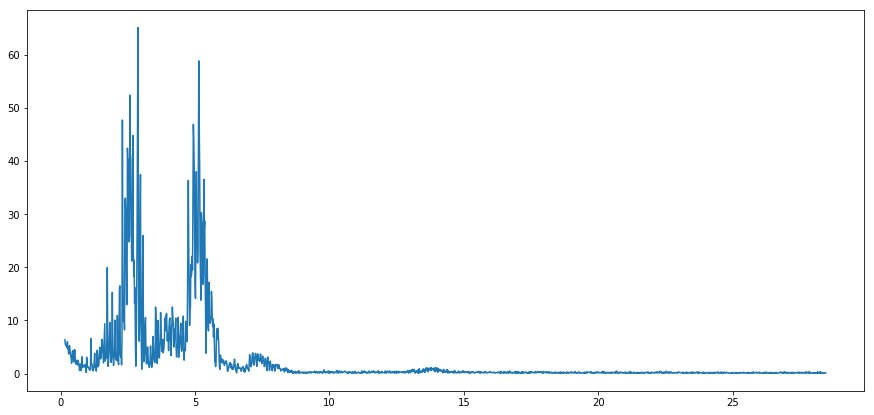

In [15]:
FFT = np.fft.fft(avg_signal)
plt.figure(figsize=(15, 7))
f = [x/64.0 for x in range(len(FFT))]
plt.plot(f[10:len(FFT)/2-1],np.abs(FFT)[10:len(FFT)/2-1])
plt.show()